In [ ]:
# sobel filter for detecting verticle and horizontal edges,/
# also do so usimg canny filter /
# explore and use laplacian filter, /
# explore and use haris corner detector/
# explore and use sift/
# apply various filter bank to detect texture in the image/


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


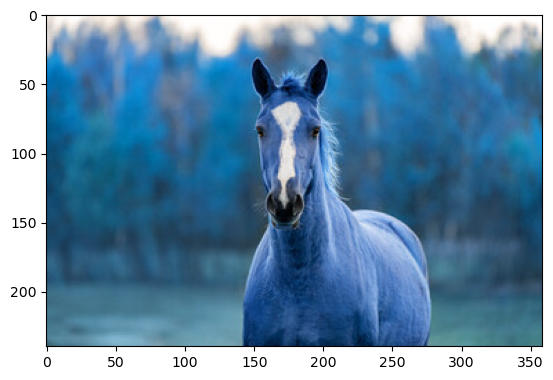

In [3]:
img = cv2.imread('horse.png')
plt.imshow(img)

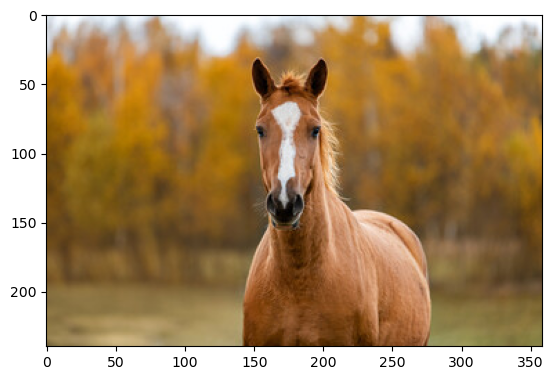

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
print("The image is of size : ",img.shape)

The image is of size :  (240, 359, 3)


### 1) Detect Horizontal & Vertical Edges Using Sobel Filter

In [6]:
image =img.copy()
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction

In [7]:
type(sobel_x), sobel_x.shape



(numpy.ndarray, (240, 359, 3))

In [8]:
sobel_x.max(), sobel_x.min()


(667.0, -668.0)

In [9]:
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

In [10]:
print(gradient_magnitude.shape)
gradient_magnitude.max(),gradient_magnitude.min()


(240, 359, 3)


(713.0007012619272, 0.0)

In [11]:
sobel_x_display = cv2.normalize(np.abs(sobel_x), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
sobel_y_display = cv2.normalize(np.abs(sobel_y), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
gradient_magnitude_display = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
print(sobel_x_display.max())
print(sobel_x_display.min())
print(sobel_x_display.shape)

255
0
(240, 359, 3)


In [12]:
print(gradient_magnitude_display.max())
print(gradient_magnitude_display.min())
print(gradient_magnitude_display.shape)

255
0
(240, 359, 3)


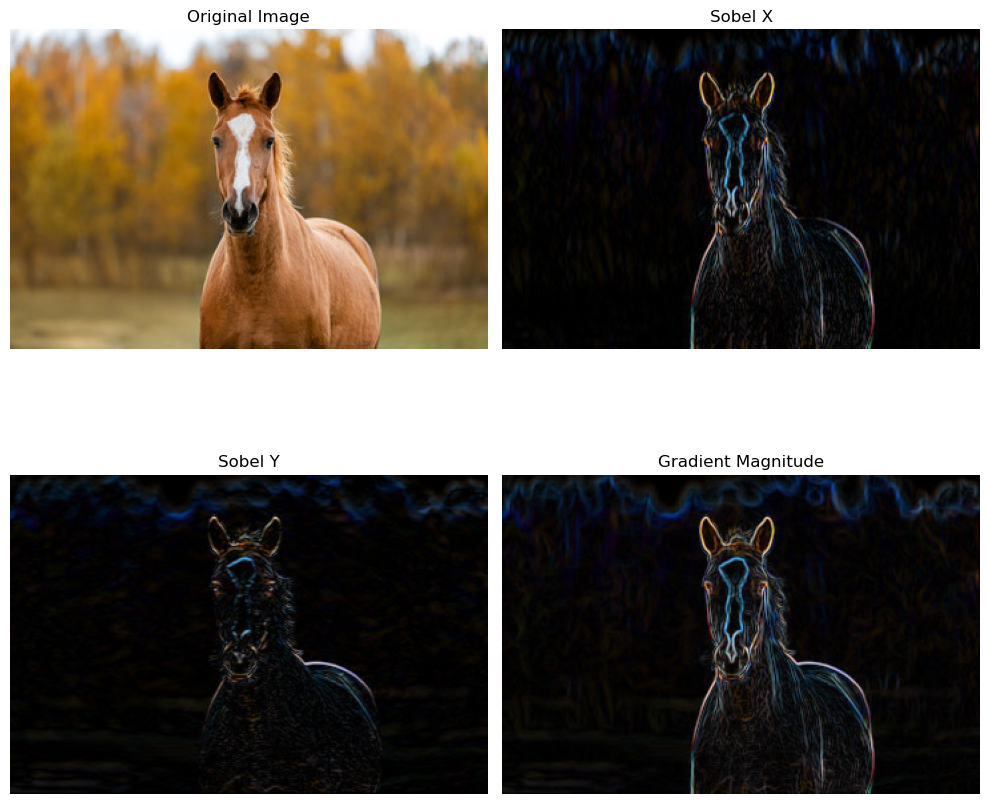

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x_display, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y_display, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Gradient Magnitude")
plt.imshow(gradient_magnitude_display, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### 2) Detect Horizontal & Vertical Edges Using Canny Filter

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

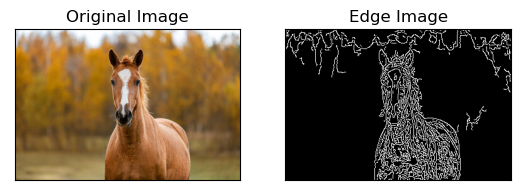

In [14]:
image = img.copy()
edges = cv2.Canny(img,0,100)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

### 3) Laplacian of Gaussian

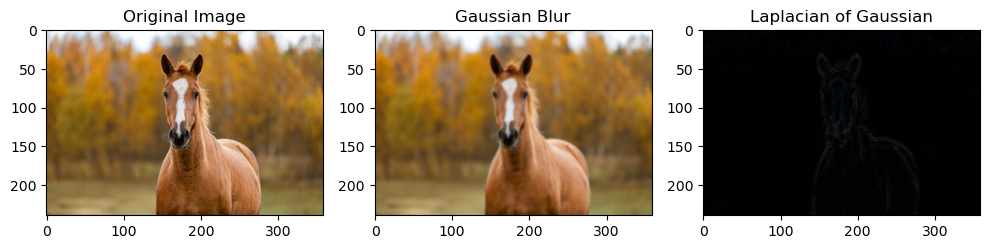

In [15]:
image = img.copy()
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

laplacian = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

laplacian = np.uint8(np.absolute(laplacian))

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Gaussian Blur")
plt.imshow(gaussian_blur, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Laplacian of Gaussian")
plt.imshow(laplacian, cmap='gray')

plt.tight_layout()
plt.show()


### 4) Harris Corner Detection

True

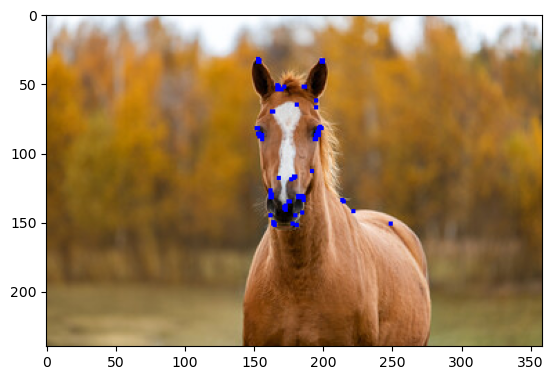

In [16]:
import cv2
import numpy as np

# Read the image
# image_path = 'cat.png'
# img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Convert to float32
gray = np.float32(gray)

# Parameters for Harris corner detection
block_size = 2
ksize = 3
k = 0.04

# # Compute Harris corner detection
dst = cv2.cornerHarris(gray, blockSize=block_size, ksize=ksize, k=k)

# # Dilate to mark the corners
dst = cv2.dilate(dst, None)

# # Threshold for an optimal value, it may vary depending on the image
threshold = 0.1
img[dst > threshold * dst.max()] = [0, 0, 255]

# # Display the result
plt.imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Optionally, save the result
cv2.imwrite('harris_corners_result.jpg', img)


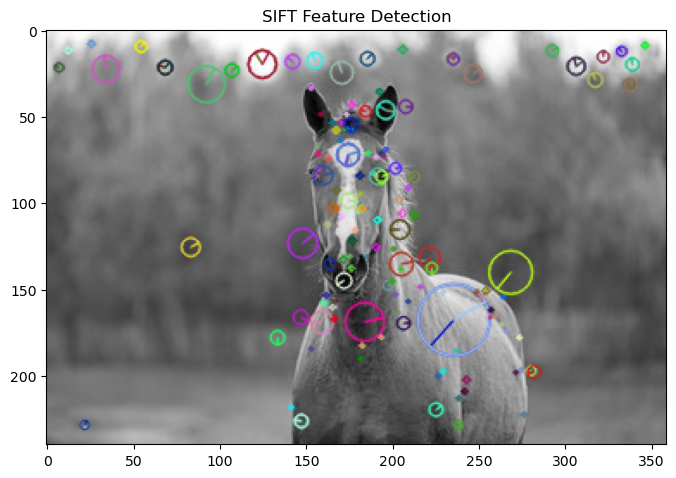

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('horse.png', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(img, None)

sift_img = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=(8, 6))
plt.imshow(sift_img, cmap='gray')
plt.title("SIFT Feature Detection")
plt.show()

In [22]:
texture = cv2.imread("texture.jpg")

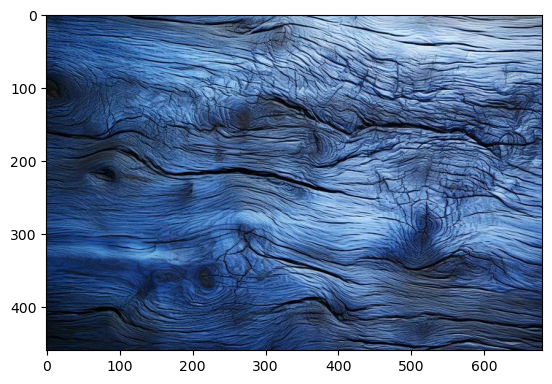

In [23]:
plt.imshow(texture)

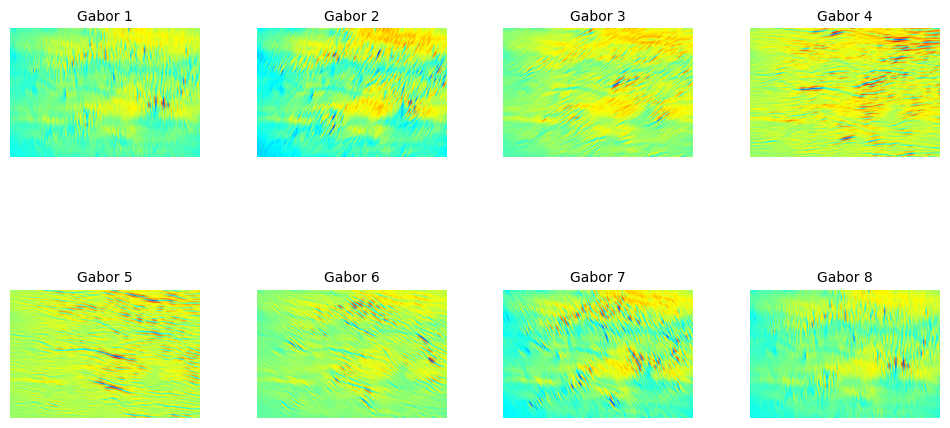

In [24]:
def apply_gabor_filters(image):
    ksize = 31  # Filter size
    num_filters = 8  # Number of orientations
    filtered_images = []
    
    for i, theta in enumerate(np.linspace(0, np.pi, num_filters)):  
        kernel = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        filtered_img = cv2.filter2D(image, cv2.CV_32F, kernel)

        # Normalize output for better visualization
        filtered_img = cv2.normalize(filtered_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Apply colormap to enhance contrast
        filtered_img = cv2.applyColorMap(filtered_img, cv2.COLORMAP_JET)
        
        filtered_images.append(filtered_img)

    fig, axs = plt.subplots(2, 4, figsize=(12, 6))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    for i, ax in enumerate(axs.flat):
        ax.imshow(cv2.cvtColor(filtered_images[i], cv2.COLOR_BGR2RGB))
        ax.set_title(f'Gabor {i+1}', fontsize=10)
        ax.axis('off')

    plt.show()

apply_gabor_filters(texture)
